# Hidden Markov Models
Initialize a hidden Markov model:

In [1]:
import numpy as np
from hmm import HMM
np.random.seed(0)  # Fix the seed to be able to reproduce the same results
kwargs = {
    'width'     : 32,
    'length'    : 32,
    'rssi_range': 4,
    'n_beacons' : 32,
    'init_pos'  : (0,0)
}
model = HMM(**kwargs)

## Observation Model
Plot the observation probabilities of the beacon 0:

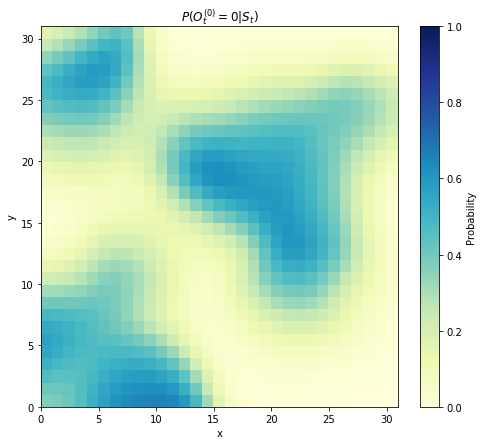

In [2]:
beacon = 0
model.plot_obs_probs(beacon)

## Transition Model
Generate a random trajectory along with the observations:

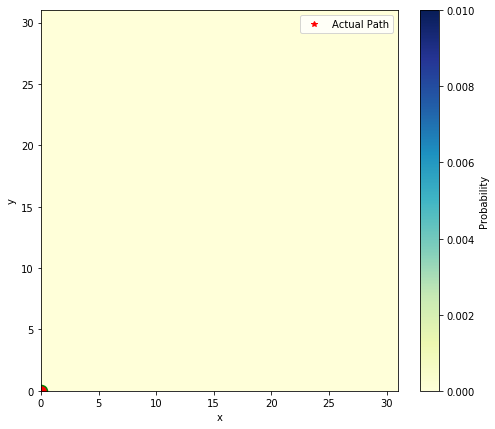

In [3]:
T = 1<<8  # Time steps
actual_path, observations = model.generate_path(T)
model.plot(path=actual_path)

## Prediction (without Observations)
Predict the future states without the observations:

In [4]:
predicted_probs = np.empty((T,model.n_states))
predicted_probs[0] = model.init_probs
for t in range(1,T):
    predicted_probs[t] = model.predict(predicted_probs[t-1])
model.plot(predicted_probs,title='prediction')

interactive(children=(IntSlider(value=0, description='t', max=255), Output()), _dom_classes=('widget-interact'…

## Monitoring
Compute the probability of the current state given all the previous observations:

In [5]:
model.n_beacons = 4
monitoring_probs = model.monitor(T,observations)
model.plot(monitoring_probs,actual_path,title='monitoring')

interactive(children=(IntSlider(value=0, description='t', max=255), Output()), _dom_classes=('widget-interact'…

## Case Study I: Uniform Initial Distribution
Use the uniform distribution as the initial condition (we have no idea where the sensor is initially):

In [6]:
model.init_probs = np.ones(model.n_states)/model.n_states

### Monitoring
Monitor the position of the sensor. Is the filter able to track the mobile sensor although it doesn't know where it is initially?

In [7]:
monitoring_probs = model.monitor(T,observations)
model.plot(monitoring_probs,actual_path,title='monitoring')

interactive(children=(IntSlider(value=0, description='t', max=255), Output()), _dom_classes=('widget-interact'…

### Hindsight Reasoning
Smooth the estimation using backwards probabilities. Can you estimate the initial position of the sensor?

In [8]:
hindsight_probs = model.hindsight(T,observations)
model.plot(hindsight_probs,actual_path,title='hindsight')

/Users/alperkamil/Box/ai/hw5/stu/hmm.py:219: RuntimeWarning: divide by zero encountered in true_divide
  hindsight_probs = (hindsight_probs.T / np.sum(hindsight_probs, axis=1)).T  # Normalization
/Users/alperkamil/Box/ai/hw5/stu/hmm.py:219: RuntimeWarning: invalid value encountered in true_divide
  hindsight_probs = (hindsight_probs.T / np.sum(hindsight_probs, axis=1)).T  # Normalization


interactive(children=(IntSlider(value=0, description='t', max=255), Output()), _dom_classes=('widget-interact'…

## Case Study II: Incorrect Initial Distribution
What if we guess the initial position wrong? Let's say we think the sensor is at the top-right corner instead of the bottom-left corner initially.

In [9]:
model.init_probs = 1e-16*np.ones(model.n_states)
model.init_probs[-1] = 1  # The opposite corner (31,31)
model.init_probs /= np.sum(model.init_probs)

### Monitoring
Is the filter still able to track the mobile sensor?

In [10]:
monitoring_probs = model.monitor(T,observations)
model.plot(monitoring_probs,actual_path,title='monitoring')

interactive(children=(IntSlider(value=0, description='t', max=255), Output()), _dom_classes=('widget-interact'…

### Hindsight Reasoning
Can we correct our guess for the initial position using hindsight reasoning?

In [11]:
hindsight_probs = model.hindsight(T,observations)
model.plot(hindsight_probs,actual_path,title='hindsight')

/Users/alperkamil/Box/ai/hw5/stu/hmm.py:219: RuntimeWarning: divide by zero encountered in true_divide
  hindsight_probs = (hindsight_probs.T / np.sum(hindsight_probs, axis=1)).T  # Normalization
/Users/alperkamil/Box/ai/hw5/stu/hmm.py:219: RuntimeWarning: invalid value encountered in true_divide
  hindsight_probs = (hindsight_probs.T / np.sum(hindsight_probs, axis=1)).T  # Normalization


interactive(children=(IntSlider(value=0, description='t', max=255), Output()), _dom_classes=('widget-interact'…

## Case Study III: Different Number of Beacons

In [12]:
model.init_probs = model.get_init_probs(kwargs['init_pos'])  # Reset the initial distribution

### Monitoring (1 Beacon)
Do we need more than one beacon to track the sensor, or is one enough?

In [13]:
model.n_beacons = 1
monitoring_probs = model.monitor(T,observations)
model.plot(monitoring_probs,actual_path,title='monitoring')

interactive(children=(IntSlider(value=0, description='t', max=255), Output()), _dom_classes=('widget-interact'…

### Monitoring (32 Beacons)
How about more beacons? Is it worth it to buy many beacons?

In [14]:
model.n_beacons = 32
monitoring_probs = model.monitor(T,observations)
model.plot(monitoring_probs,actual_path,title='monitoring')

interactive(children=(IntSlider(value=0, description='t', max=255), Output()), _dom_classes=('widget-interact'…